In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ananyapillai","key":"0816174af7ee11ed4a06a199607f95c6"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir birdprediction

In [ ]:
%cd birdprediction

/content/birdprediction


In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.91G/1.91G [00:14<00:00, 246MB/s]
100% 1.91G/1.91G [00:14<00:00, 141MB/s]


In [ ]:
!unzip 100-bird-species.zip -d 100-birds-species

Streaming output truncated to the last 5000 lines.
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/028.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/029.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/030.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/031.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/032.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/033.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/034.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/035.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/036.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/037.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/038.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/039.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/040.jpg  
  inflating: 100-birds-species/train/WHITE NECKED RAVEN/041.jpg  
  inflating: 100-birds-sp

In [ ]:
rm 100-bird-species.zip

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
birds= pd.read_csv("/content/birdprediction/100-birds-species/birds.csv")

In [ ]:
birds.head()

,class id,filepaths,labels,data set,scientific name
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [ ]:
label_counts = birds["labels"].value_counts()[:10]

In [ ]:
print(label_counts)
labels_all= np.sum(label_counts.values)
print(labels_all)

RUFOUS TREPE             273
HOUSE FINCH              258
OVENBIRD                 243
D-ARNAUDS BARBET         243
ASIAN GREEN BEE EATER    230
SWINHOES PHEASANT        226
WOOD DUCK                224
CASPIAN TERN             223
RED BILLED TROPICBIRD    222
WOOD THRUSH              221
Name: labels, dtype: int64
2363


In [ ]:
print(label_counts.index)

Index(['RUFOUS TREPE', 'HOUSE FINCH', 'OVENBIRD', 'D-ARNAUDS BARBET',
       'ASIAN GREEN BEE EATER', 'SWINHOES PHEASANT', 'WOOD DUCK',
       'CASPIAN TERN', 'RED BILLED TROPICBIRD', 'WOOD THRUSH'],
      dtype='object')


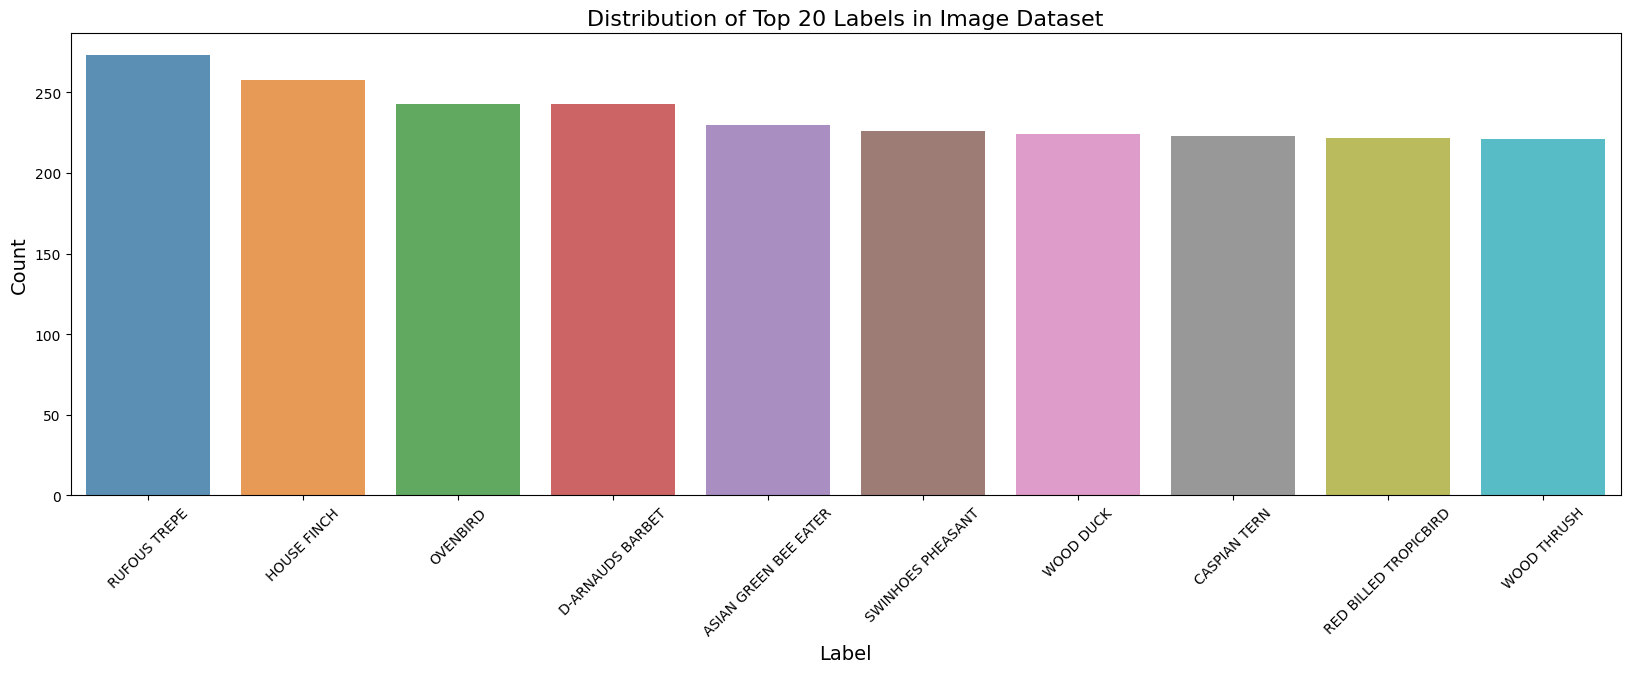

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8)
plt.title('Distribution of Top 20 Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45) 
plt.show()

In [ ]:
data_dir = "/content/birdprediction/100-birds-species/train"

# Load images and extract class labels
X_data = []
y_data = []
for class_label in os.listdir(data_dir):
    if class_label in label_counts.index:  # Filter out labels not present in labels_all
        class_dir = os.path.join(data_dir, class_label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)  # Load image using OpenCV
            X_data.append(img)  # Append image to input data
            y_data.append(class_label)  # Append class label to target data

# Convert class labels to numerical labels
label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y_data)

# Perform one-hot encoding using label_binarize
y_onehot = label_binarize(y_numerical, classes=np.unique(y_numerical))

# Example: Print first 5 image paths, class labels, numerical labels, and one-hot encoded labels
for i in range(5):
    print("Image path: ", os.path.join(data_dir, y_data[i], img_file))
    print("Class label: ", y_data[i])
    print("Numerical label: ", y_numerical[i])
    print("One-hot encoded label: ", y_onehot[i])
    print("---------------")

Image path:  /content/birdprediction/100-birds-species/train/WOOD THRUSH/160.jpg
Class label:  WOOD THRUSH
Numerical label:  9
One-hot encoded label:  [0 0 0 0 0 0 0 0 0 1]
---------------
Image path:  /content/birdprediction/100-birds-species/train/WOOD THRUSH/160.jpg
Class label:  WOOD THRUSH
Numerical label:  9
One-hot encoded label:  [0 0 0 0 0 0 0 0 0 1]
---------------
Image path:  /content/birdprediction/100-birds-species/train/WOOD THRUSH/160.jpg
Class label:  WOOD THRUSH
Numerical label:  9
One-hot encoded label:  [0 0 0 0 0 0 0 0 0 1]
---------------
Image path:  /content/birdprediction/100-birds-species/train/WOOD THRUSH/160.jpg
Class label:  WOOD THRUSH
Numerical label:  9
One-hot encoded label:  [0 0 0 0 0 0 0 0 0 1]
---------------
Image path:  /content/birdprediction/100-birds-species/train/WOOD THRUSH/160.jpg
Class label:  WOOD THRUSH
Numerical label:  9
One-hot encoded label:  [0 0 0 0 0 0 0 0 0 1]
---------------


In [ ]:
print(y_onehot.shape)

(2263, 10)


In [ ]:
labels = birds[(birds["labels"].isin(label_counts.index))]
labels = labels.reset_index()
labels.head()

,index,class id,filepaths,labels,data set,scientific name
0,6255,40,train/ASIAN GREEN BEE EATER/1.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
1,6256,40,train/ASIAN GREEN BEE EATER/10.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
2,6257,40,train/ASIAN GREEN BEE EATER/100.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
3,6258,40,train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
4,6259,40,train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS


In [ ]:
dir_path = "/content/birdprediction/100-birds-species/train"

# Load the labels_all series into a pandas Series object
# Assuming the labels_all series contains the names of the labels as index and the labels as values

# Create an empty list to store the image arrays
image_arrays = []

# Loop through image folders in the directory
for label in os.listdir(dir_path):
    label_path = os.path.join(dir_path, label)
    if os.path.isdir(label_path) and label in label_counts.index:
        # Loop through images in the image folder
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            if image_name.endswith(".jpg") or image_name.endswith(".png"):
                # Read and process the image
                image = cv2.imread(image_path)
                # Convert image to array
                image_array = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image_array_normalized = image_array / 255.0
                # Optionally, perform further image processing or data preprocessing tasks here
                # Store the image array in a data structure for further processing
                # For example, you can append the image array to the list
                image_arrays.append(image_array_normalized)

# Convert the list of image arrays to a NumPy array
image_arrays = np.array(image_arrays)

# Print the shape of the image arrays (number of images, height, width, channels)
print("Shape of image arrays:", image_arrays.shape)

Shape of image arrays: (2263, 224, 224, 3)


In [ ]:
print('\nTrain Images shape: ',image_arrays.shape,' size: {:,}'.format(image_arrays.size))
print('One-hot encoded output shape: ',y_onehot.shape,' size: {:,}'.format(y_onehot.size))


Train Images shape:  (2263, 224, 224, 3)  size: 340,644,864
One-hot encoded output shape:  (2263, 10)  size: 22,630


In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(label_counts.index), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

In [ ]:
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(image_arrays, y_onehot, test_size = 0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [ ]:
epochs = 20
batch_size = 4

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/20
407/407 [==============================] - 278s 680ms/step - loss: 4.6933 - accuracy: 0.1456 - val_loss: 3.6667 - val_accuracy: 0.2328
Epoch 2/20
407/407 [==============================] - 273s 671ms/step - loss: 3.2256 - accuracy: 0.2678 - val_loss: 2.9550 - val_accuracy: 0.2990
Epoch 3/20
407/407 [==============================] - 276s 679ms/step - loss: 2.6807 - accuracy: 0.3974 - val_loss: 2.6143 - val_accuracy: 0.3946
Epoch 4/20
407/407 [==============================] - 269s 661ms/step - loss: 2.3557 - accuracy: 0.4994 - val_loss: 2.3280 - val_accuracy: 0.5000
Epoch 5/20
407/407 [==============================] - 276s 679ms/step - loss: 2.1274 - accuracy: 0.5455 - val_loss: 2.2880 - val_accuracy: 0.4657
Epoch 6/20
407/407 [==============================] - 277s 682ms/step - loss: 2.0067 - accuracy: 0.5829 - val_loss: 2.2414 - val_accuracy: 0.4951
Epoch 7/20
407/407 [==============================] - 276s 679ms/step - loss: 1.8987 - accuracy: 0.5897 - val_loss: 2.0835 -

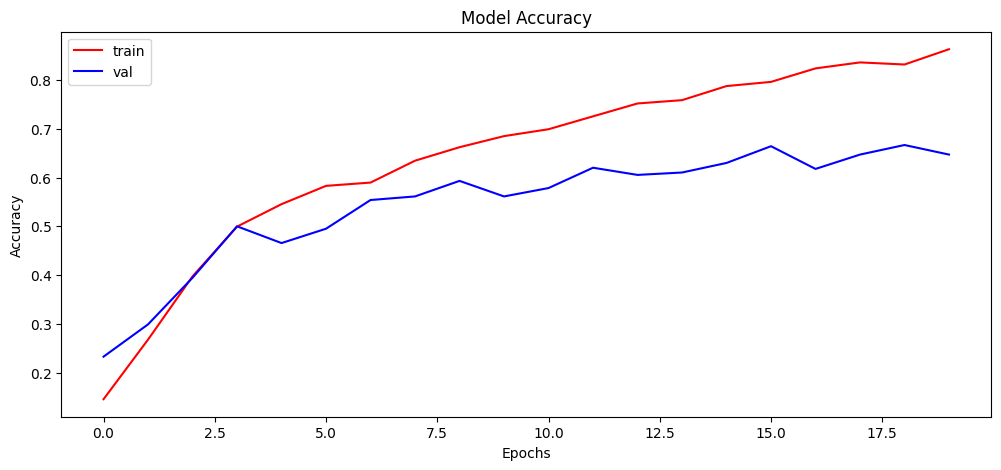

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

8/8 [==============================] - 8s 847ms/step - loss: 1.9115 - accuracy: 0.6035
Accuracy over the test set: 
  60.35 %


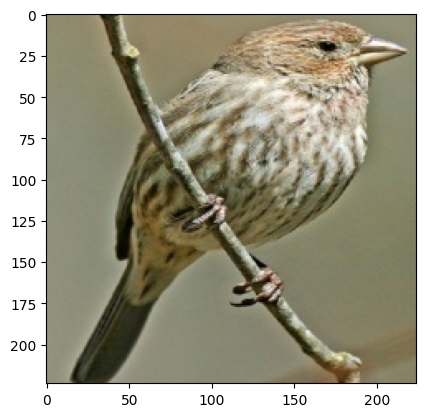

Originally :  ASIAN GREEN BEE EATER
Predicted :  ASIAN GREEN BEE EATER


In [ ]:
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['labels'][np.argmax(Y_test[1])])
print("Predicted : ",labels['labels'][np.argmax(Y_pred[1])])